# MNIST Classification

**Introduction**

The MNIST dataset is a database of Hand Written digits.The MNIST database of handwritten digits,which has a training set of 60,000 examples, and a test set of 10,000 examples. Each images is of size 28x28 pixels. So each entry has 784(28*28) features i.e. the 2D images streched to be 1D. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. 

The scope of this study is to check how well Machine Algorithms such as SVM aided with Dimensionality reducing algorithms i.e PCA perform in contrast to Deep Learning's Neural Nets - ANN.
 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## Data Analysis

In [ ]:
## Loading the data
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784')

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
## let us look the description of this dataset
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [ ]:
mnist["frame"]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [ ]:
df=mnist["frame"]

In [ ]:
print(mnist["feature_names"])

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel9

In [ ]:
print(mnist["target_names"])

['class']


**Train Test Split**

In [ ]:
x=mnist["data"]
y=mnist["target"]

In [ ]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
train_x=x[:60000]
train_y=y[:60000]


In [ ]:
test_x=x[60000:]
test_y=y[60000:]

In [ ]:
train_x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
60000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let us look closely into a single entry

In [ ]:
temp=train_x.loc[0].values

In [ ]:
temp

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
type(temp)

numpy.ndarray

In [ ]:
temp.shape

(784,)

It was mentioned in the description that the images are 28 x 28 pixels. Let us try to visualize a single image by reshaping the data

In [ ]:
temp=temp.reshape(28,28)

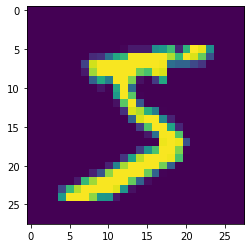

In [ ]:
plt.imshow(temp)

In [ ]:
px.imshow(temp)

By looking visually, we can classify the images as number 5. Let us look into its corresponding target value

In [ ]:
train_y[0]

'5'

## Machine Learning Algorithms

Before feeding the data directly to SVM classifier, I will be creating 2 models one is plain SVM Classifier and the other is PCA aided SVM. It is a good try to reduce the dimensionality of the data, asthe data is huge i.e (70000,784).

#### Dimensionality Reduction using PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=200)

In [ ]:
new_train_x=pca.fit_transform(train_x)

In [ ]:
new_train_x

array([[ 123.93258866, -312.67426202,  -24.51405175, ...,  -12.91515989,
         -18.55643461,   33.57217782],
       [1011.71837587, -294.85703826,  596.33956105, ...,    1.46146543,
          -6.13581758,   19.65488932],
       [ -51.84960805,  392.17315285, -188.50974943, ...,  -39.92934788,
         -45.35223247,  -21.68249251],
       ...,
       [-178.0534496 ,  160.07821109, -257.61308226, ...,  -26.47213363,
         -23.46498577,  -55.83931327],
       [ 130.60607208,   -5.59193643,  513.85867395, ...,   42.64113541,
          26.6141005 ,   11.8943855 ],
       [-173.43595244,  -24.71880226,  556.01889394, ...,  -23.34986779,
         -36.17124561,   -4.63992704]])

In [ ]:
new_train_x.shape

(60000, 200)

We have reduced the 784 columns to 200.

#### Support Vector Machines

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

In order to check the effect of dimensionality reduction, let us create 2 pipleines, one with PCA and the other one with out

In [ ]:
pipe1=Pipeline([
    ("pca",PCA(n_components=0.90)),
    ("scaler",StandardScaler()),
    ("clf",SVC())
])

In [ ]:
pipe2=Pipeline([
    ("scaler",StandardScaler()),
    ("clf",SVC())
])

In [ ]:
%%time
pipe1.fit(train_x,train_y)
pipe1_preds=pipe1.predict(train_x)

CPU times: user 4min 13s, sys: 1.53 s, total: 4min 15s
Wall time: 4min 17s


In [ ]:
print("Metrics of THe Dimesionally Reduced Data")
print(f"Accuarcy Score  is {accuracy_score(pipe1_preds,train_y)}")
print(f"Recall Score  is {recall_score(pipe1_preds,train_y,average='weighted')}")
print(f"Precision Score  is {precision_score(pipe1_preds,train_y,average='weighted')}")


Metrics of THe Dimesionally Reduced Data
Accuarcy Score  is 0.9951833333333333
Recall Score  is 0.9951833333333333
Precision Score  is 0.995185782250551


In [ ]:
%%time
pipe2.fit(train_x,train_y)
pipe2_preds=pipe2.predict(train_x)

CPU times: user 16min 51s, sys: 1.13 s, total: 16min 52s
Wall time: 17min 19s


In [ ]:
print("Metrics of Non Dimesionally Reduced Data")
print(f"Accuarcy Score  is {accuracy_score(pipe2_preds,train_y)}")
print(f"Recall Score  is {recall_score(pipe2_preds,train_y,average='weighted')}")
print(f"Precision Score  is {precision_score(pipe2_preds,train_y,average='weighted')}")

Metrics of Non Dimesionally Reduced Data
Accuarcy Score  is 0.9866333333333334
Recall Score  is 0.9866333333333334
Precision Score  is 0.9866515412923075


In [ ]:
pipe1_test_preds=pipe1.predict(test_x)
pipe2_test_preds=pipe2.predict(test_x)

In [ ]:
print("                                                   Testing Metrics")
print("Dimensionally Reduced Data:")
print(f"Accuarcy Score  is {accuracy_score(pipe1_test_preds,test_y)}")
print(f"Recall Score  is {recall_score(pipe1_test_preds,test_y,average='weighted')}")
print(f"Precision Score  is {precision_score(pipe1_test_preds,test_y,average='weighted')}")
print("Dimensionally Un-Reduced Data:")
print(f"Accuarcy Score  is {accuracy_score(pipe2_test_preds,test_y)}")
print(f"Recall Score  is {recall_score(pipe2_test_preds,test_y,average='weighted')}")
print(f"Precision Score  is {precision_score(pipe2_test_preds,test_y,average='weighted')}")

                                                   Testing Metrics
Dimensionally Reduced Data:
Accuarcy Score  is 0.9816
Recall Score  is 0.9816
Precision Score  is 0.981628952230383
Dimensionally Un-Reduced Data:
Accuarcy Score  is 0.966
Recall Score  is 0.966
Precision Score  is 0.9661422097487079


So we can observe that by reducing the data dimensionality we have obtained considerable change in the metrics. The accuracy nearly increased by 2%

## Artificial Neural Networks (ANN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

Let us load the data again from keras library.

In [ ]:
(train_x, train_y) , (test_x, test_y) = keras.datasets.mnist.load_data()

In [ ]:
train_x

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
%%time
model.fit(train_x, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 19.5827 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3905 - accuracy: 0.8965
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3376 - accuracy: 0.9097
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3093 - accuracy: 0.9168
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2897 - accuracy: 0.9208
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2637 - accuracy: 0.9272
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2501 - accuracy: 0.9293
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2292 - accuracy: 0.9342
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2165 - accuracy: 0.9378
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.20

Let us scale the values, inorder to see if the results are any better

In [ ]:
train_x=train_x/255
test_x = test_x/255   # 255 since the max pixel value =255

In [ ]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
%%time
model1.fit(train_x, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2620 - accuracy: 0.9237
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1124 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0816 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0615 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0505 - accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0404 - accuracy: 0.9864
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0326 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0295 - accuracy: 0.9907
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238 - accuracy: 0.9918
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.021

By scaling the values we can see a considerable increase in the accuracy i.e 6%

#### Metrics

In [ ]:
test_preds=model.predict(test_x)
test_preds

array([[4.4514865e-01, 2.4079546e-02, 9.3741792e-01, ..., 9.9982017e-01,
        7.1465164e-01, 9.1184980e-01],
       [1.4859861e-01, 9.2855471e-01, 9.9980348e-01, ..., 5.1639450e-01,
        1.8708347e-01, 6.6304193e-03],
       [6.7800662e-04, 9.8744476e-01, 9.2578605e-03, ..., 1.4577042e-02,
        6.2523563e-03, 2.4736077e-03],
       ...,
       [1.6263433e-01, 9.8186010e-01, 2.9015923e-01, ..., 7.0594621e-01,
        6.7755735e-01, 9.7022939e-01],
       [9.9990666e-01, 2.5279549e-14, 3.1279589e-04, ..., 7.6778215e-01,
        7.2171888e-04, 2.3430345e-25],
       [1.0000000e+00, 9.9998975e-01, 1.0000000e+00, ..., 9.9975926e-01,
        1.0000000e+00, 9.9999952e-01]], dtype=float32)

In [ ]:
test_preds=[np.argmax(i) for i in test_preds]
test_preds[:20]

[7, 2, 1, 0, 4, 1, 4, 9, 0, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]

In [ ]:
print("               Without Scalling - Testing Metrics")
print(f"Accuarcy : {accuracy_score(test_y,test_preds)}")
print(f"Precision : {precision_score(test_y,test_preds,average='weighted')}")
print(f"Recall :   {recall_score(test_y,test_preds,average='weighted')}")

               Without Scalling - Testing Metrics
Accuarcy : 0.8679
Precision : 0.8690827484837995
Recall :   0.8679


In [ ]:
test_preds1=model1.predict(test_x)
test_preds1

array([[3.1189813e-07, 3.8558446e-02, 4.9173303e-02, ..., 1.0000000e+00,
        2.5645932e-03, 6.2506431e-01],
       [1.0905612e-06, 9.9552059e-01, 1.0000000e+00, ..., 1.1472344e-05,
        5.7624336e-05, 1.5507690e-12],
       [2.1445398e-05, 9.9999821e-01, 7.3648715e-01, ..., 9.1326970e-01,
        7.8192580e-01, 4.1842100e-04],
       ...,
       [1.8850793e-08, 2.3042520e-04, 1.3571555e-08, ..., 9.8213297e-01,
        9.6452242e-01, 9.9999630e-01],
       [6.0126348e-04, 7.1389722e-03, 1.0452718e-06, ..., 7.0235160e-06,
        9.5194060e-01, 2.5240512e-04],
       [9.2387110e-01, 1.0417369e-08, 1.8232405e-06, ..., 2.9254657e-08,
        8.6919072e-06, 1.5560919e-01]], dtype=float32)

In [ ]:
test_preds1=[np.argmax(i) for i in test_preds1]
test_preds1[:20]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]

In [ ]:
print("               Scalled Data - Testing Metrics")
print(f"Accuarcy : {accuracy_score(test_y,test_preds1)}")
print(f"Precision : {precision_score(test_y,test_preds1,average='weighted')}")
print(f"Recall :   {recall_score(test_y,test_preds1,average='weighted')}")

               Scalled Data - Testing Metrics
Accuarcy : 0.978
Precision : 0.9780151926423462
Recall :   0.978


## Results

The accuracies of the trained models are mentioned below.

The **training accuaracies** and the training time of the models are shown below
<br>
<table>
<tr>
<th> Model</th>
<th> Accuracy</th>
<th> Training Time </th>
</tr>
<tr>
<th> SVM </th>
<th>   0.9866 </th>
<th> 17 mins 19 secs  </th>
</tr>
<tr>
<th> PCA + SVM </th>
<th> 0.9951 </th>
<th> 4 mins 17 secs  </th>
</tr>
<tr>
<th> ANN </th>
<th> 0.9399 </th>
<th> 55 secs </th>
</tr>
<tr>
<th> Scaled ANN </th>
<th> 0.9922 </th>
<th> 1 min 22 secs
</tr>
</table>

<br>

*   We can observe that the Plain SVM and Plain ANN's have better *training* accuracies than their tweaked versions i.e PCA+SVM and Scaled ANN's.
*   It is to be noted that reducing the dimensionality of data has significantly decreased the training time for the SVM model i.e the training time has been reduced to nearly 25% by reducing the data dimensions to 90%. 

**Testing Metrics**
<br>
<br>
<table>
<tr>
<th> Model </th>
<th> Accuracy </th>
<th> Precision </th>
<th> Recall </th>
</tr>
<tr>
<th> SVM </th>
<th> 0.966 </th>
<th> 0.966 </th>
<th> 0.966 </th>
</tr><tr>
<th> PCA + SVM </th>
<th> 0.9816 </th>
<th> 0.9816 </th>
<th> 0.9816 </th>
</tr><tr>
<th> ANN </th>
<th> 0.8679 </th>
<th> 0.8690 </th>
<th> 0.8679 </th>
</tr><tr>
<th> Scaled ANN </th>
<th> 0.978 </th>
<th> 0.978 </th>
<th> 0.978 </th>
</tr>
</table>
<br>


*   It is to be noted that even if the accuracies of the tweaked models are comparitevely low in training, these models performed better than the original base models when it comes to Testing Accuracies.
*   We can also observe that the Dimensionally Reduced SVM has an better overall accuracy compared to other models. And the next best is the Scaled ANN.
*   The base Model ANN's has a considerable drop in the testing accuracy from training accuracy. 





## Conclusion

In certain Cases, with Correct usage of the algorithms, Traditional Machine Learning Algorithms can also provide competeting accuracies compared to the Artificial Neural Networks. That being said, ML algos may use high rescources such as the PCA+SVM took 4 min 17secs to train whereas the ANN's took only 1 min 22 secs, which nearly 1/3 of the PCA+SVM training time.
<br>
Further study can be done by comparing other Machine Learning Algorithm combinations such as Logistic Regressions, Random Forests and Clustering Techniques such as K Means etc. with different ANN Architectures.